In [3]:
import os

In [4]:
!gdalinfo -nomd /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif

Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif
       /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif.aux.xml
Size is 250, 250
Coordinate System is:
PROJCS["WGS 84 / UTM zone 15N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-93],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false

In [5]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from osgeo import osr
import math

In [6]:
file_name=r'/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif'

In [7]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f29278769f0> >

In [8]:
 print('File list:',ds.GetFileList())

File list: ['/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif', '/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif.aux.xml']


In [9]:
print('Width:',ds.RasterXSize)

Width: 250


In [10]:
print('Height:',ds.RasterYSize)

Height: 250


In [11]:
print('Coordinate system:',ds.GetProjection())

Coordinate system: PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]


In [12]:
gt = ds.GetGeoTransform()
gt

(462405.0, 30.0, 0.0, 1741815.0, 0.0, -30.0)

In [13]:
print('Origin:',(gt[0],gt[3]))
print('Pixel Size:',(gt[1],gt[5]))

Origin: (462405.0, 1741815.0)
Pixel Size: (30.0, -30.0)


In [14]:
print('Upper Left Corner:',gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:',gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper Left Corner: [462405.0, 1741815.0]
Upper Right Corner: [469905.0, 1741815.0]
Lower Left Corner: [462405.0, 1734315.0]
Lower Right Corner: [469905.0, 1734315.0]
Center: [466155.0, 1738065.0]


In [15]:
print('Metadata:',ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area', 'Band_1': 'band 1 reflectance', 'Band_2': 'band 2 reflectance', 'Band_3': 'band 3 reflectance', 'Band_4': 'band 4 reflectance', 'Band_5': 'band 5 reflectance', 'Band_6': 'band 7 reflectance', 'Band_7': 'band 6 temperature', 'Band_8': 'Band 8'}


In [16]:
print('Image Structure Metadata:',ds.GetMetadata('IMAGE_STRUCTURE'))

Image Structure Metadata: {'INTERLEAVE': 'PIXEL'}


In [17]:
print('Number of bands:',ds.RasterCount)

Number of bands: 8


In [18]:
for i in range(1, ds.RasterCount+1):
  band=ds.GetRasterBand(i)
  interp=band.GetColorInterpretation()
  interp_name=gdal.GetColorInterpretationName(interp)
  (w,h)=band.GetBlockSize()
  print('Band {0:d},block size{1:d}{2:d},color interp{3:s}'.format(i,w,h,interp_name))
  ovr_count=band.GetOverviewCount()
  for j in range(ovr_count):
    ovr_band=band.GetOverview(j)
    print('Overview %d: %dx%d'%(j, ovr_band.XSize, ovrband.YSize))

Band 1,block size2502,color interpGray
Band 2,block size2502,color interpUndefined
Band 3,block size2502,color interpUndefined
Band 4,block size2502,color interpUndefined
Band 5,block size2502,color interpUndefined
Band 6,block size2502,color interpUndefined
Band 7,block size2502,color interpUndefined
Band 8,block size2502,color interpUndefined


In [19]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f29278769f0> >

In [20]:
del ds

In [21]:
!gdalinfo -stats /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif

Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif
       /content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220492002106EDC00_stack.gtif.aux.xml
Size is 250, 250
Coordinate System is:
PROJCS["WGS 84 / UTM zone 15N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-93],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false

In [22]:
ds = gdal.Open(file_name)

In [23]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f2927876210> >

In [24]:
for i in range(1, ds.RasterCount+1):
  band=ds.GetRasterBand(i)
  (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
  print('Band{:d}, min={:.3f},max={:.3f},mean={:.3f},stddev={:.3f}'.format(i,minimum,maximum,mean,stddev))

Band1, min=544.000,max=16000.000,mean=1178.732,stddev=1991.062
Band2, min=584.000,max=16000.000,mean=1276.125,stddev=1670.227
Band3, min=435.000,max=16000.000,mean=1460.093,stddev=2065.470
Band4, min=1007.000,max=8178.000,mean=2700.183,stddev=710.130
Band5, min=464.000,max=16000.000,mean=3380.361,stddev=1909.803
Band6, min=141.000,max=16000.000,mean=2144.406,stddev=1140.745
Band7, min=1601.000,max=3360.000,mean=2783.961,stddev=271.222
Band8, min=0.000,max=4.000,mean=0.943,stddev=1.618


In [25]:
band=ds.GetRasterBand(1)

In [26]:
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f290d342720> >

In [27]:
data=band.ReadAsArray()

In [28]:
data

array([[906, 925, 886, ..., 791, 732, 693],
       [945, 945, 906, ..., 771, 750, 769],
       [964, 925, 886, ..., 770, 769, 729],
       ...,
       [874, 874, 874, ..., 889, 870, 831],
       [855, 836, 894, ..., 850, 850, 831],
       [855, 855, 855, ..., 831, 850, 830]], dtype=int16)

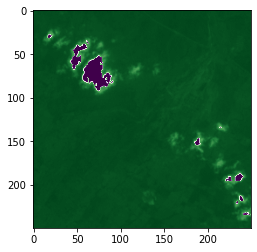

In [29]:
plt.imshow(data,cmap='PRGn_r')